<a href="https://colab.research.google.com/github/linhvuueh/-10-3-VU-PHUONG-LINH---31241023210/blob/main/%5BMNIST%5D_VU_PHUONG_LINH_31241023210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt  # Corrected import statement

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 28*28)
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape(10000, 28*28)
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(112, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=250, batch_size=64, validation_data=(X_test, y_test))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 112)                 │          57,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 460,506 (1.76 MB)

 Trainable params: 460,506 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.8939 - loss: 0.3653 - val_accuracy: 0.9694 - val_loss: 0.0990
Epoch 2/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9750 - loss: 0.0818 - val_accuracy: 0.9750 - val_loss: 0.0821
Epoch 3/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9833 - loss: 0.0515 - val_accuracy: 0.9787 - val_loss: 0.0720
Epoch 4/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9896 - loss: 0.0337 - val_accuracy: 0.9781 - val_loss: 0.0720
Epoch 5/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9914 - loss: 0.0265 - val_accuracy: 0.9779 - val_loss: 0.0800
Epoch 6/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9913 - loss: 0.0252 - val_accuracy: 0.9803 - val_loss: 0.0757
Epoch 7/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9941 - loss: 0.0173 - val_accuracy: 0.9802 - val_loss: 0.0749
Epoch 8/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9949 - loss: 0.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


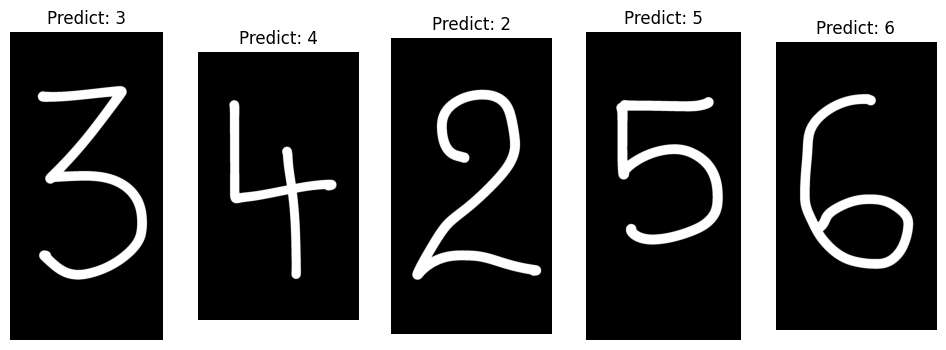

Predicted Digits: [3, 4, 2, 5, 6]


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model


def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img.astype("float32") / 255.0
    img = img.reshape(1, 784)
    return img

def predict_multiple_digits(image_paths, model):
    plt.figure(figsize=(12, 4))

    predicted_digits = []
    for i, image_path in enumerate(image_paths):
        processed_img = preprocess_image(image_path)
        prediction = model.predict(processed_img)
        predicted_digit = np.argmax(prediction)
        predicted_digits.append(predicted_digit)

        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Predict: {predicted_digit}")
        plt.axis('off')

    plt.show()
    return predicted_digits


image_paths = [
    '/content/6b7aeb62-bee4-4996-b683-51d42af03090.jfif',
    '/content/db98f3d8-4248-4f43-88f5-96ecf6b6a0c3.jfif',
    '/content/96e9318c-1ce3-4d6c-9020-7b527382200b.jfif',
    '/content/06d79f22-2f83-43f8-a07c-464a7a33b7a0.jfif',
    '/content/35b33ca3-7974-4cbb-bd5b-247ebc10a866.jfif'
]


predicted_digits = predict_multiple_digits(image_paths, model)
print(f"Predicted Digits: {predicted_digits}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


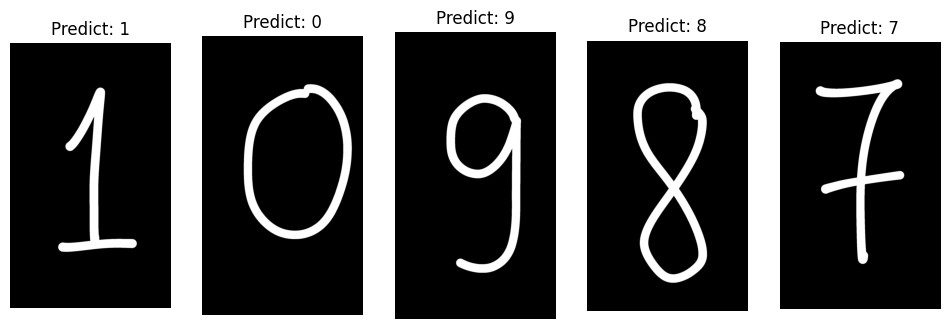

Predicted Digits: [1, 0, 9, 8, 7]


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model


def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img.astype("float32") / 255.0
    img = img.reshape(1, 784)
    return img

def predict_multiple_digits(image_paths, model):
    plt.figure(figsize=(12, 4))

    predicted_digits = []
    for i, image_path in enumerate(image_paths):
        processed_img = preprocess_image(image_path)
        prediction = model.predict(processed_img)
        predicted_digit = np.argmax(prediction)
        predicted_digits.append(predicted_digit)

        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Predict: {predicted_digit}")
        plt.axis('off')

    plt.show()
    return predicted_digits


image_paths = [
    '/content/95b7b863-9cb4-4c1b-88fa-da449196003c.jfif',
    '/content/96b1922d-8520-4c8f-aec5-e7fab53332f2.jfif',
    '/content/ef9c5343-48a8-4802-a35b-2eecc700f452.jfif',
    '/content/2033a17b-9893-4cfc-b514-71ae8863c72e.jfif',
    '/content/c0cfbf9a-c8c4-4664-9fdc-497b4c8884c7.jfif'
]


predicted_digits = predict_multiple_digits(image_paths, model)
print(f"Predicted Digits: {predicted_digits}")
